In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2023_world_prosperity.csv to 2023_world_prosperity.csv
Saving Hospital_Ranking_Data_2023.csv to Hospital_Ranking_Data_2023.csv
Saving WHR2023.csv to WHR2023.csv
Saving wikipedia_cost_of_living_indices3.csv to wikipedia_cost_of_living_indices3.csv
Saving world-data-2023.csv to world-data-2023.csv


In [ ]:
happy_df = pd.read_csv('WHR2023.csv')
world_prosp_df = pd.read_csv('2023_world_prosperity.csv')
hosp_rank_df = pd.read_csv('Hospital_Ranking_Data_2023.csv')
world_data_df = pd.read_csv('world-data-2023.csv')
cost_of_living_df = pd.read_csv('wikipedia_cost_of_living_indices3.csv')

In [ ]:
display(happy_df.info())
happy_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

None

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
127,Zambia,3.982,0.094,4.167,3.797,8.074,0.694,55.032,0.791,0.098,0.818,1.778,0.914,0.890,0.095,0.545,0.189,0.080,1.270
128,Tanzania,3.694,0.075,3.840,3.547,7.857,0.653,59.401,0.838,0.182,0.554,1.778,0.836,0.787,0.214,0.607,0.234,0.269,0.747
129,Comoros,3.545,0.117,3.774,3.317,8.075,0.471,59.425,0.470,-0.014,0.727,1.778,0.914,0.327,0.215,0.117,0.129,0.145,1.699
130,Malawi,3.495,0.090,3.671,3.320,7.302,0.531,58.475,0.750,0.005,0.749,1.778,0.637,0.479,0.189,0.490,0.139,0.129,1.432
131,Botswana,3.435,0.136,3.702,3.168,9.629,0.753,54.725,0.742,-0.215,0.830,1.778,1.471,1.041,0.087,0.480,0.021,0.071,0.264
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [ ]:
# Cleaning Happiness Dataframe

# List of columns to drop
columns_to_drop = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker']

# Drop the specified columns from the DataFrame
happy_cleaned = happy_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
happy_cleaned.tail()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [ ]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
           'Ladder score']

# Scale the columns to a range of 1 to 10 for all countries
scaler = MinMaxScaler(feature_range=(1, 10))
happy_scaled_df = happy_df.copy()
happy_scaled_df[columns] = scaler.fit_transform(happy_df[columns])

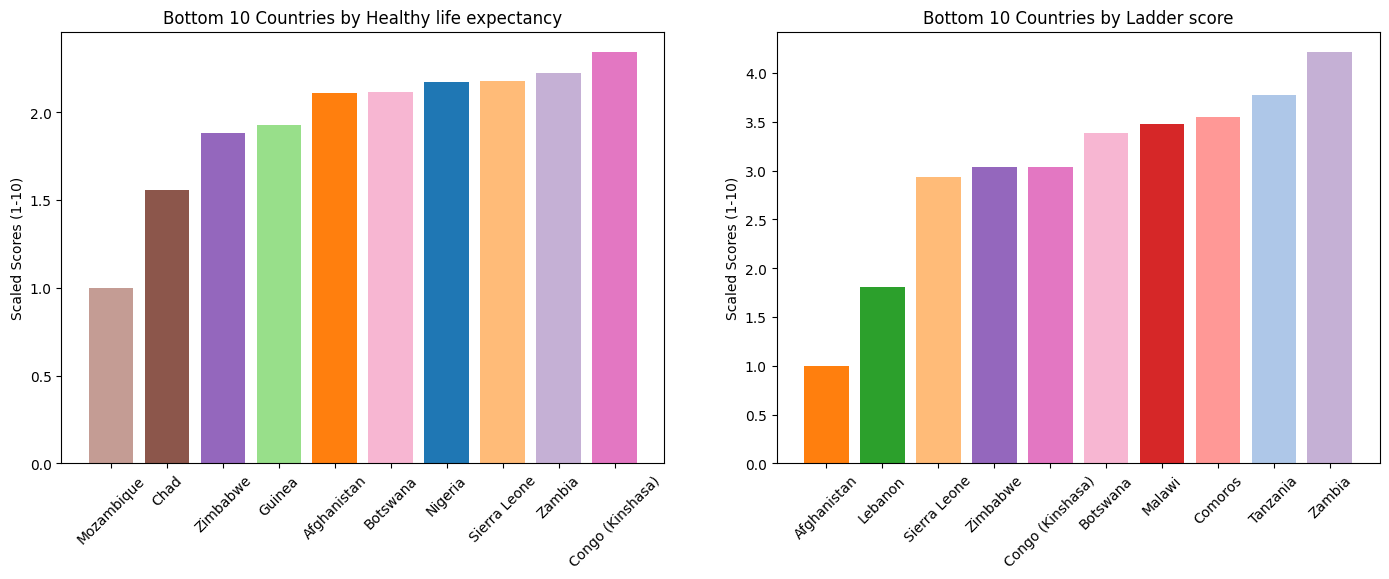

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle
# from the happiness dataframe
# Creating a bar graph to show bottom 10 countries in healthy life expectancy and ladder score
# Define columns of interest
columns = ['Healthy life expectancy', 'Ladder score']

# Create a set of all countries that appear in the bottom 10 for each column
bottom_countries = set()
for col in columns:
    bottom_countries.update(happy_scaled_df.nsmallest(10, col)['Country name'])

# Assign colors to countries using tab20 and tab20c colormaps
colors1 = plt.cm.tab20(range(20))
colors2 = plt.cm.tab20c(range(20))
all_colors = list(colors1) + list(colors2)
color_map = {country: color for country, color in zip(bottom_countries, all_colors)}

# Function to plot bottom 10 countries for a given column
def plot_bottom10(df, column, ax):
    bottom10 = df[['Country name', column]].nsmallest(10, column)
    colors = [color_map.get(country, 'grey') for country in bottom10['Country name']]
    ax.bar(bottom10['Country name'], bottom10[column], color=colors)
    ax.set_ylabel('Scaled Scores (1-10)')
    ax.set_title(f'Bottom 10 Countries by {column}')
    ax.tick_params(axis='x', rotation=45)

# Creating subplots for specified columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout(pad=5.0)

# Loop through each column of interest and create a bar graph for bottom 10 countries
for i, col in enumerate(columns):
    plot_bottom10(happy_scaled_df, col, axes[i])

# Show plot
plt.show()


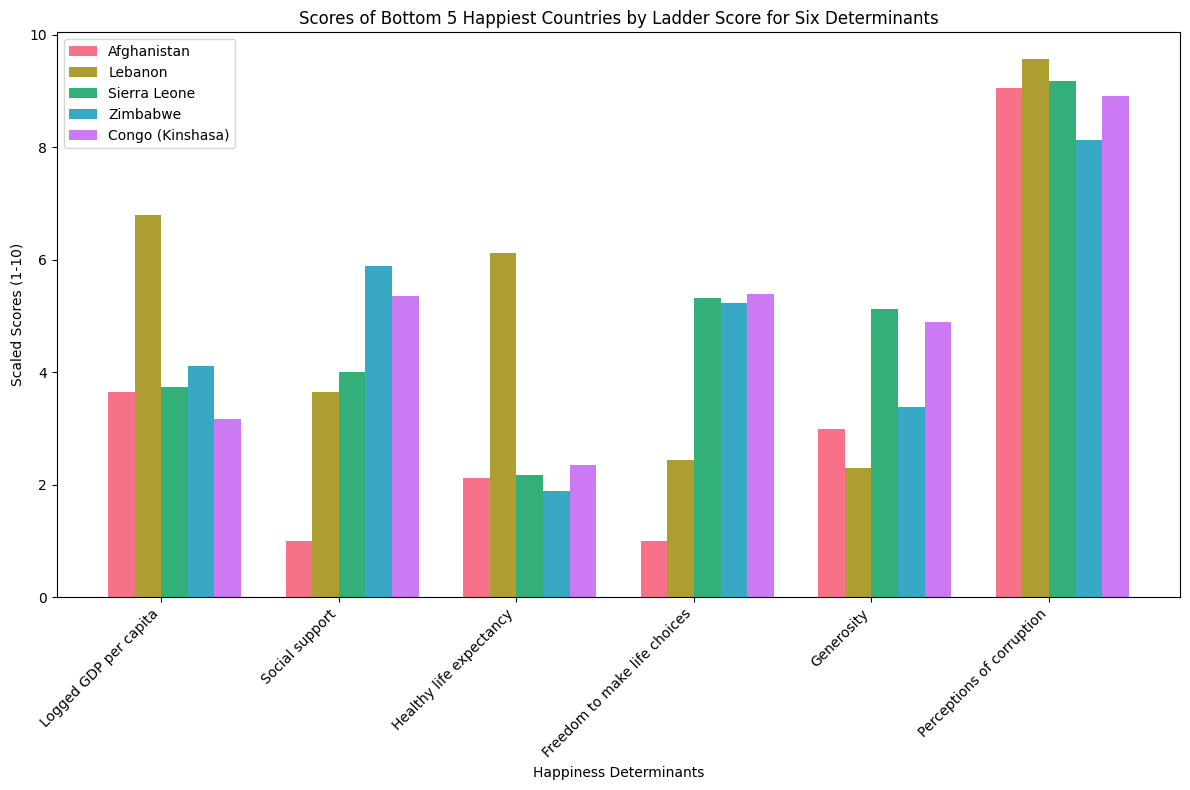

In [ ]:
# bottom 5 countries in the ladder score

bottom_countries =  ['Afghanistan', 'Lebanon', 'Sierra Leone', 'Zimbabwe', 'Congo (Kinshasa)']
columns_to_plot = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Filtering the dataframe for the top countries
bottom_df_scaled = happy_scaled_df[happy_scaled_df['Country name'].isin(bottom_countries)]

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(columns_to_plot))

# Setting a color palette
colors = sns.color_palette("husl", len(bottom_countries))

# Creating bars for each country
for i, (country, color) in enumerate(zip(bottom_countries, colors)):
    plt.bar([p + bar_width * i for p in x],
            bottom_df_scaled[bottom_df_scaled['Country name'] == country][columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Happiness Determinants')
plt.ylabel('Scaled Scores (1-10)')
plt.title('Scores of Bottom 5 Happiest Countries by Ladder Score for Six Determinants')
plt.xticks([p + 1.5 * bar_width for p in x], columns_to_plot, rotation=45, ha='right')
plt.legend(bottom_countries)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
display(world_prosp_df.info())
display(world_prosp_df.head())
display(world_prosp_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

None

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
166,South Sudan,30.40,16.54,26.98,22.16,36.10,33.34,37.52,32.89,32.30,21.99,35.69,18.99,50.35


In [ ]:
#dropping null values and renaming column

# Drop null values
world_prosp_df.dropna(inplace=True)

# Rename 'AveragScore' column to 'Average Score'
world_prosp_df.rename(columns={'AveragScore': 'Average Score'}, inplace=True)
display(world_prosp_df.head())

,Country,Average Score,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


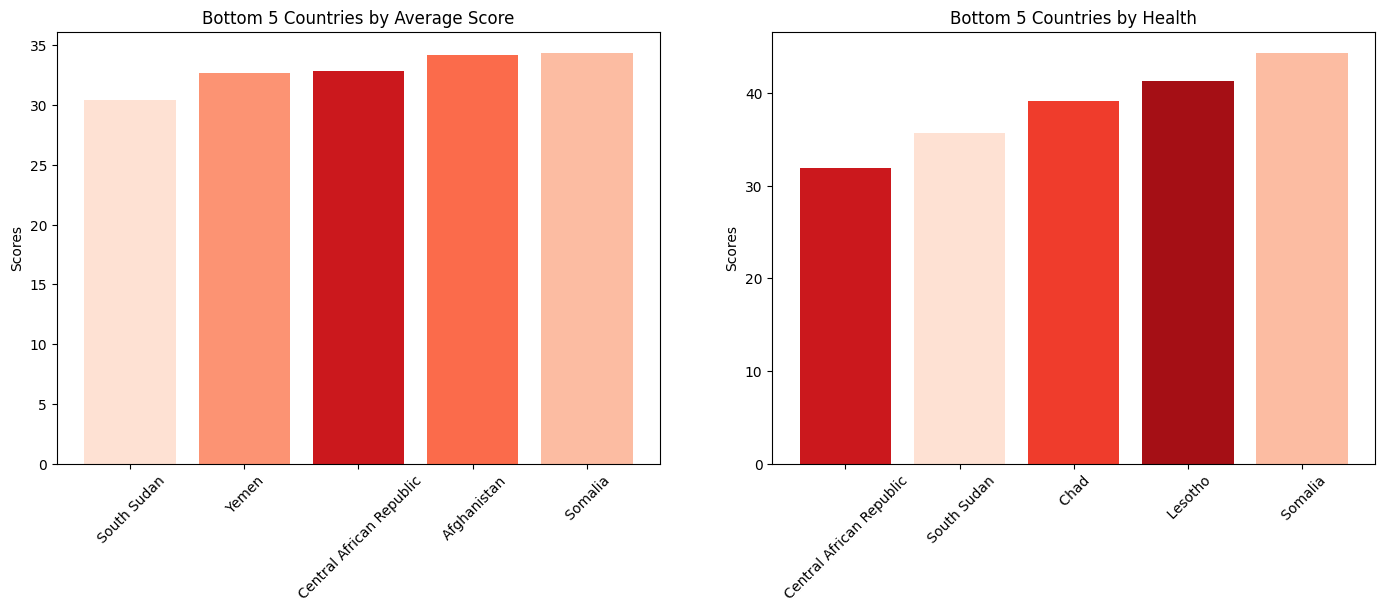

In [ ]:
# Define columns of interest
columns = ['Average Score', 'Health']

# Creating a list of all countries that appear in the bottom five for each column
bottom_countries = set()
for col in columns:
    bottom_countries.update(world_prosp_df.nsmallest(5, col)['Country'])

# Assigning colors to countries
colors1 = sns.color_palette("Reds_r", len(bottom_countries))
colors2 = sns.color_palette("Blues_r", len(bottom_countries))
all_colors = colors1 + colors2
color_map = {country: color for country, color in zip(bottom_countries, all_colors)}

# Function to plot bottom five countries for a given column
def plot_bottom5(df, column, ax):
    bottom5 = df[['Country', column]].nsmallest(5, column)
    colors = [color_map.get(country, 'grey') for country in bottom5['Country']]
    ax.bar(bottom5['Country'], bottom5[column], color=colors)
    ax.set_ylabel('Scores')
    ax.set_title(f'Bottom 5 Countries by {column}')
    ax.tick_params(axis='x', rotation=45)

# Creating subplots for specified columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout(pad=5.0)

# Loop through each column of interest and create a bar graph for bottom 5 countries
for i, col in enumerate(columns):
    plot_bottom5(world_prosp_df, col, axes[i])

# Show plot
plt.show()



In [ ]:
display(world_data_df.info())
display(world_data_df.head())
display(world_data_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

None

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332
194,Zimbabwe,38,ZW,41.90%,"390,757","51,000",30.68,263.0,Harare,"10,983",...,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.015438,29.154857


In [ ]:
# Dropping null values
world_data_df.dropna(inplace=True)


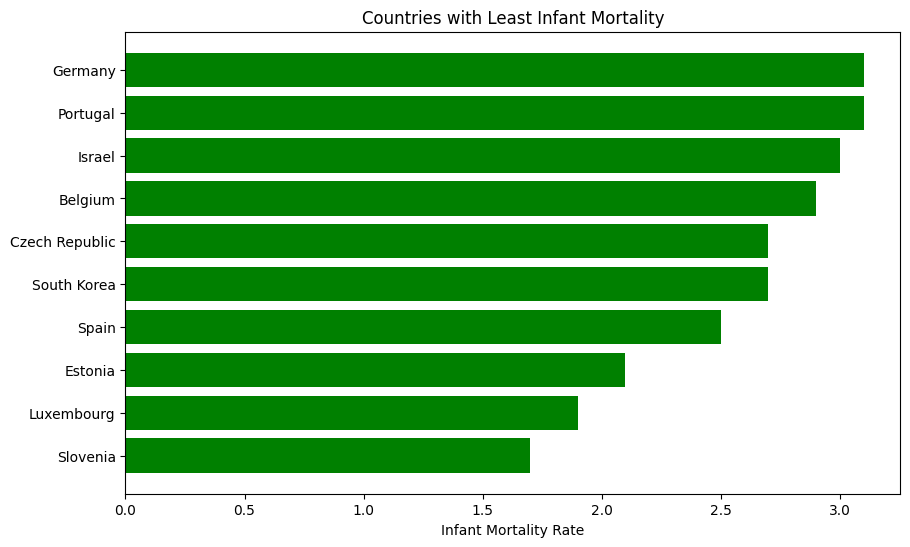

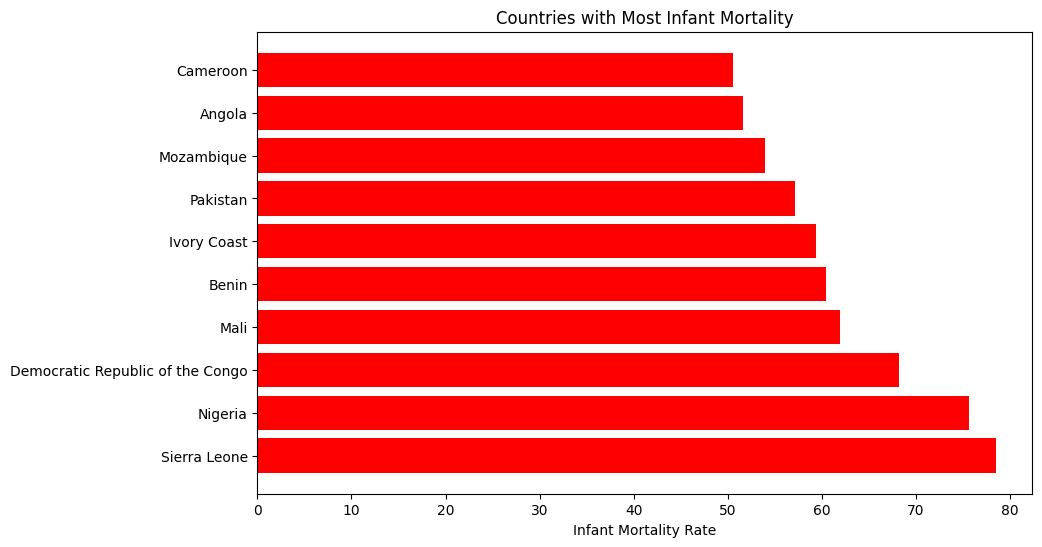

In [ ]:
# Extracting the top 10 countries with the least infant mortality
least_infant_mortality = world_data_df.sort_values(by='Infant mortality').head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(least_infant_mortality['Country'], least_infant_mortality['Infant mortality'], color='green')
plt.xlabel('Infant Mortality Rate')
plt.title('Countries with Least Infant Mortality')

# Invert y-axis to have countries with least at the top

# Show plot
plt.show()

# Extracting the top 10 countries with the most infant mortality
most_infant_mortality = world_data_df.sort_values(by='Infant mortality', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(most_infant_mortality['Country'], most_infant_mortality['Infant mortality'], color='red')
plt.xlabel('Infant Mortality Rate')
plt.title('Countries with Most Infant Mortality')

# Inverting y-axis to have countries with most at the top

# Show plot
plt.show()

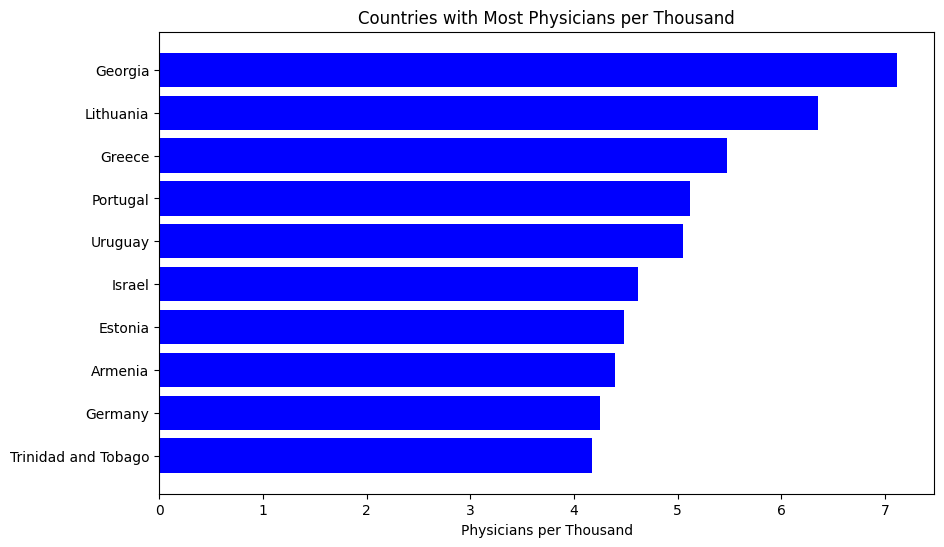

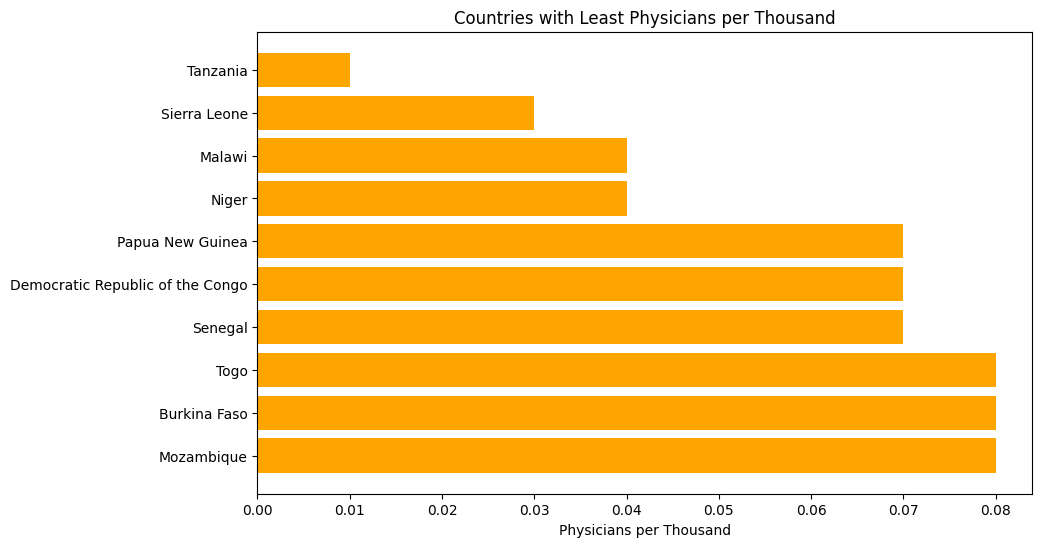

In [ ]:
# Extracting the top 10 countries with the most physicians per thousand
most_physicians = world_data_df.sort_values(by='Physicians per thousand', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(most_physicians['Country'], most_physicians['Physicians per thousand'], color='blue')
plt.xlabel('Physicians per Thousand')
plt.title('Countries with Most Physicians per Thousand')

# Invert y-axis to have countries with most at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

least_physicians = world_data_df.sort_values(by='Physicians per thousand').head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(least_physicians['Country'], least_physicians['Physicians per thousand'], color='orange')
plt.xlabel('Physicians per Thousand')
plt.title('Countries with Least Physicians per Thousand')

# Invert y-axis to have countries with least at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

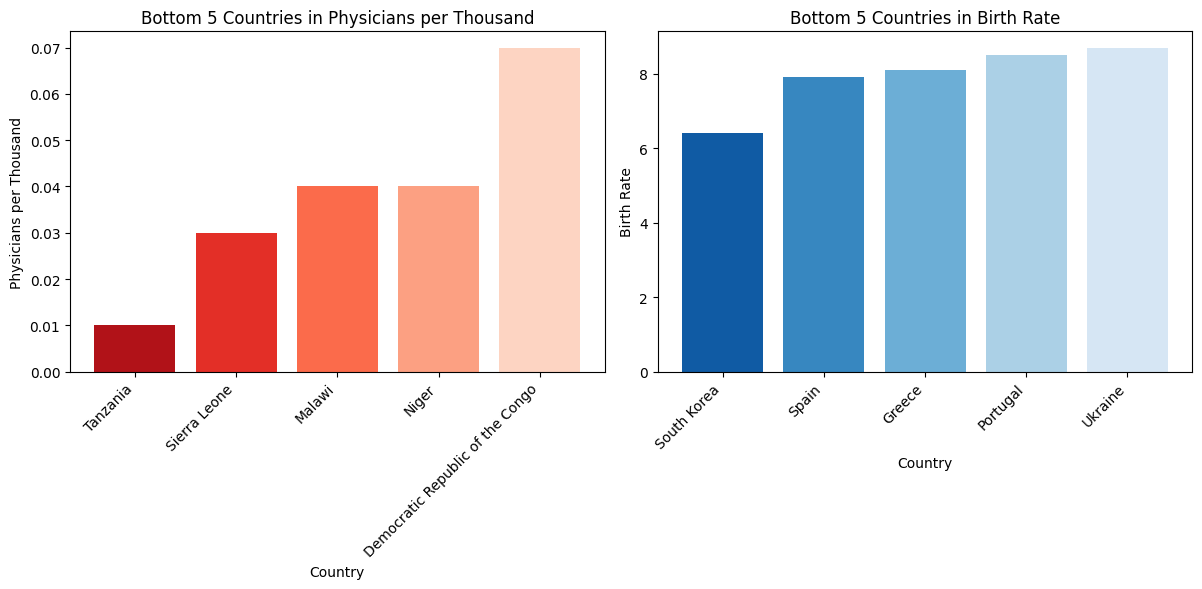

In [ ]:

# Extracting the bottom 5 countries based on 'Physicians per thousand' and 'Birth Rate'
bottom_5_physicians = world_data_df.nsmallest(5, 'Physicians per thousand')
bottom_5_birth_rate = world_data_df.nsmallest(5, 'Birth Rate')

# Extracting country names for the bottom 5 in each category
bottom_countries_physicians = bottom_5_physicians['Country'].tolist()
bottom_countries_birth_rate = bottom_5_birth_rate['Country'].tolist()

# Plotting
plt.figure(figsize=(18, 6))

# Set color palettes for each plot
colors_physicians = sns.color_palette("Reds_r", len(bottom_countries_physicians))
colors_birth_rate = sns.color_palette("Blues_r", len(bottom_countries_birth_rate))

# Plot for Physicians per Thousand
plt.subplot(1, 3, 1)
plt.bar(bottom_countries_physicians, bottom_5_physicians['Physicians per thousand'], color=colors_physicians)
plt.xlabel('Country')
plt.ylabel('Physicians per Thousand')
plt.title('Bottom 5 Countries in Physicians per Thousand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot for Birth Rate
plt.subplot(1, 3, 2)
plt.bar(bottom_countries_birth_rate, bottom_5_birth_rate['Birth Rate'], color=colors_birth_rate)
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.title('Bottom 5 Countries in Birth Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Show plot
plt.show()


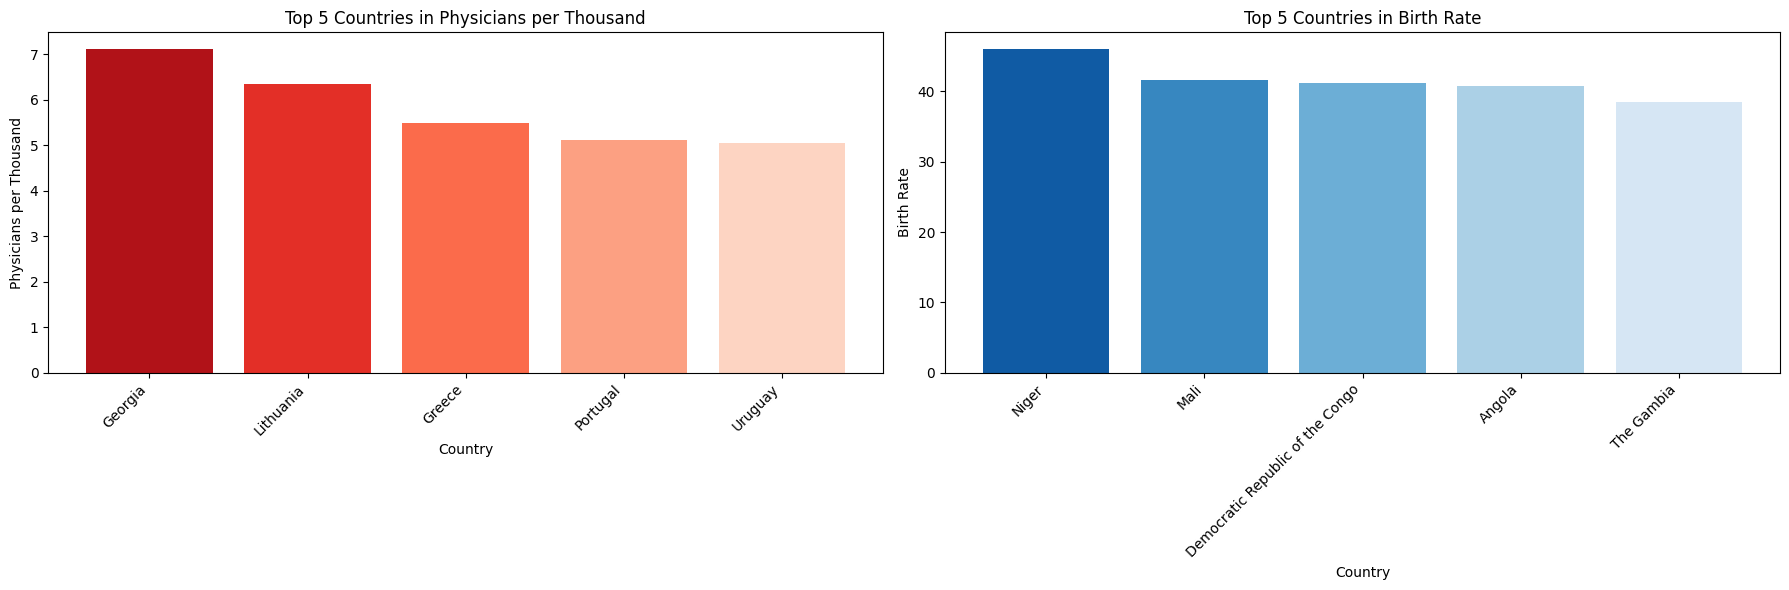

In [ ]:
# Extracting the top 5 countries based on 'Physicians per thousand' and 'Birth Rate'
top_5_physicians = world_data_df.nlargest(5, 'Physicians per thousand')
top_5_birth_rate = world_data_df.nlargest(5, 'Birth Rate')

# Extracting country names for the top 5 in each category
top_countries_physicians = top_5_physicians['Country'].tolist()
top_countries_birth_rate = top_5_birth_rate['Country'].tolist()

# Plotting
plt.figure(figsize=(18, 6))

# Set color palettes for each plot
colors_physicians = sns.color_palette("Reds_r", len(top_countries_physicians))
colors_birth_rate = sns.color_palette("Blues_r", len(top_countries_birth_rate))

# Plot for Physicians per Thousand
plt.subplot(1, 2, 1)
plt.bar(top_countries_physicians, top_5_physicians['Physicians per thousand'], color=colors_physicians)
plt.xlabel('Country')
plt.ylabel('Physicians per Thousand')
plt.title('Top 5 Countries in Physicians per Thousand')
plt.xticks(rotation=45, ha='right')

# Plot for Birth Rate
plt.subplot(1, 2, 2)
plt.bar(top_countries_birth_rate, top_5_birth_rate['Birth Rate'], color=colors_birth_rate)
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.title('Top 5 Countries in Birth Rate')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


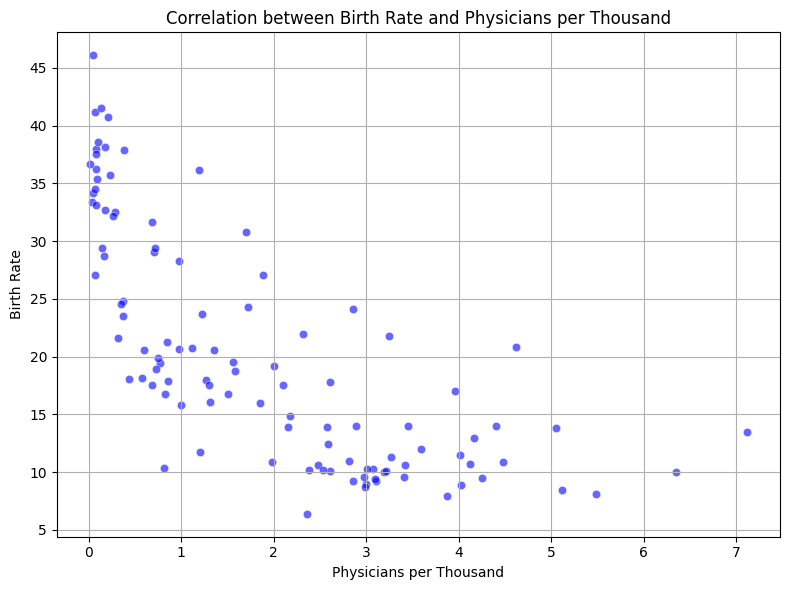

In [ ]:
# Plotting to show the correlation between 'Birth Rate' and Physicians per Thousand'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physicians per thousand', y='Birth Rate', data=world_data_df, color='b', alpha=0.6)
plt.title('Correlation between Birth Rate and Physicians per Thousand')
plt.xlabel('Physicians per Thousand')
plt.ylabel('Birth Rate')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Merge 'happy_cleaned' and 'world_data_df' based on 'Country'
merged_df = pd.merge(happy_cleaned, world_data_df, left_on='Country name', right_on='Country')

# Display the merged DataFrame
display(merged_df.head())
display(merged_df.tail())

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,...,24.40%,4.62,"9,053,300",64.00%,23.10%,25.30%,3.86%,"8,374,393",31.046051,34.851612
1,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,...,10.60%,3.01,"645,397",59.30%,26.50%,20.40%,5.36%,"565,488",49.815273,6.129583
2,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,...,12.60%,3.59,"4,841,000",69.90%,29.00%,34.60%,4.07%,"4,258,860",-40.900557,174.885971
3,Canada,6.961,10.773,0.929,71.400,0.874,0.153,0.420,1.778,1.881,...,14.60%,2.61,"36,991,981",65.10%,12.80%,24.50%,5.56%,"30,628,482",56.130366,-106.346771
4,Germany,6.892,10.879,0.896,71.300,0.846,0.030,0.420,1.778,1.919,...,12.50%,4.25,"83,132,799",60.80%,11.50%,48.80%,3.04%,"64,324,835",51.165691,10.451526


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
85,Malawi,3.495,7.302,0.531,58.475,0.750,0.005,0.749,1.778,0.637,...,11.00%,0.04,"18,628,747",76.70%,17.30%,34.50%,5.65%,"3,199,301",-13.254308,34.301525
86,Botswana,3.435,9.629,0.753,54.725,0.742,-0.215,0.830,1.778,1.471,...,5.30%,0.37,"2,346,179",70.80%,19.50%,25.10%,18.19%,"1,616,550",-22.328474,24.684866
87,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,...,38.20%,0.03,"7,813,215",57.90%,8.60%,30.70%,4.43%,"3,319,366",8.460555,-11.779889
88,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,...,32.10%,2.10,"6,855,713",47.00%,15.30%,32.20%,6.23%,"6,084,994",33.854721,35.862285
89,Afghanistan,1.859,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953


In [ ]:
# Check for null values in the entire merged_df dataframe
null_values = merged_df.isnull().sum()

# Display columns with null values
print(null_values[null_values > 0])

Series([], dtype: int64)


In [ ]:
# Drop null values
merged_df_clean = merged_df.dropna()
# Display
display(merged_df_clean.head())

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,...,24.40%,4.62,"9,053,300",64.00%,23.10%,25.30%,3.86%,"8,374,393",31.046051,34.851612
1,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,...,10.60%,3.01,"645,397",59.30%,26.50%,20.40%,5.36%,"565,488",49.815273,6.129583
2,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,...,12.60%,3.59,"4,841,000",69.90%,29.00%,34.60%,4.07%,"4,258,860",-40.900557,174.885971
3,Canada,6.961,10.773,0.929,71.400,0.874,0.153,0.420,1.778,1.881,...,14.60%,2.61,"36,991,981",65.10%,12.80%,24.50%,5.56%,"30,628,482",56.130366,-106.346771
4,Germany,6.892,10.879,0.896,71.300,0.846,0.030,0.420,1.778,1.919,...,12.50%,4.25,"83,132,799",60.80%,11.50%,48.80%,3.04%,"64,324,835",51.165691,10.451526


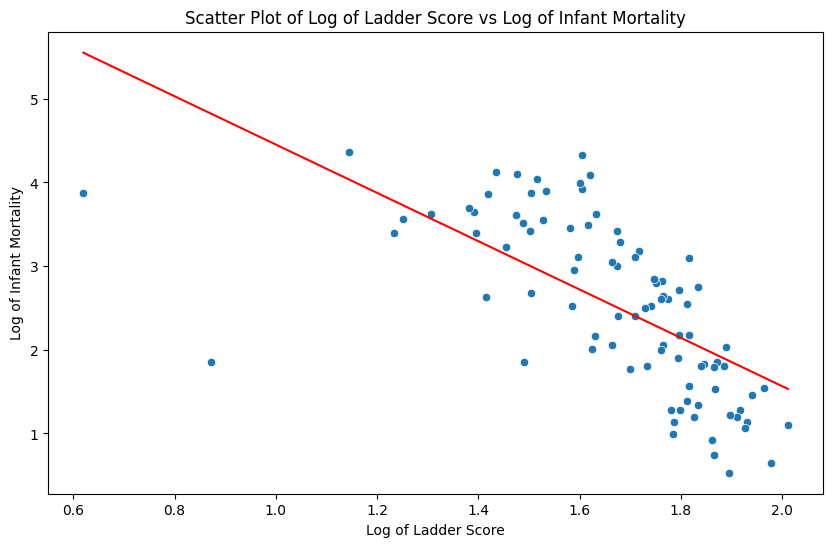

In [ ]:
#
# Compute logarithms
merged_df['log_Infant_mortality'] = np.log(merged_df['Infant mortality'])
merged_df['log_Ladder_score'] = np.log(merged_df['Ladder score'])

# Create scatter plot with logarithmic axes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Ladder_score', y='log_Infant_mortality', data=merged_df)

# Add labels and title
plt.xlabel('Log of Ladder Score')
plt.ylabel('Log of Infant Mortality')
plt.title('Scatter Plot of Log of Ladder Score vs Log of Infant Mortality')

# Compute and plot linear regression line
z = np.polyfit(merged_df['log_Ladder_score'], merged_df['log_Infant_mortality'], 1)
p = np.poly1d(z)
plt.plot(merged_df['log_Ladder_score'], p(merged_df['log_Ladder_score']), 'r')

# Show plot
plt.show()

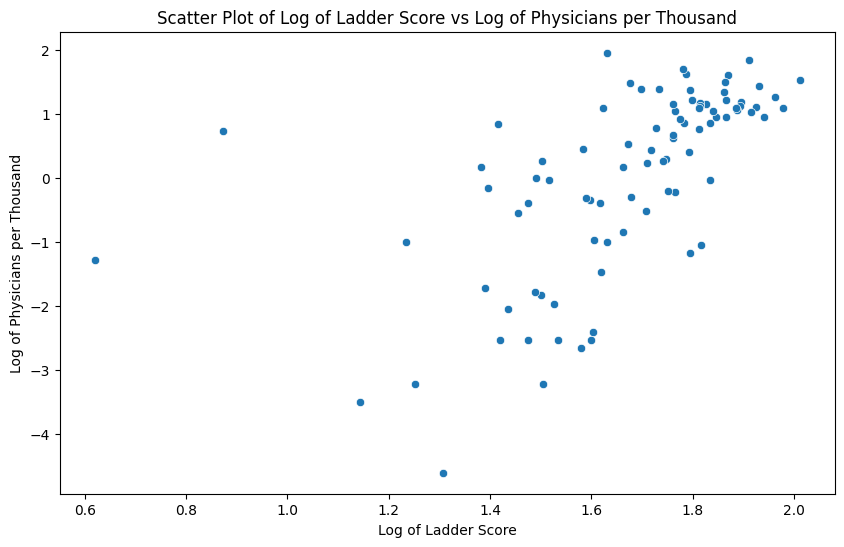

In [ ]:
# Adding logarithmic columns
merged_df['log_Ladder_score'] = np.log(merged_df['Ladder score'])
merged_df['log_Physicians_per_thousand'] = np.log(merged_df['Physicians per thousand'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Ladder_score', y='log_Physicians_per_thousand', data=merged_df)

# Add labels and title
plt.xlabel('Log of Ladder Score')
plt.ylabel('Log of Physicians per Thousand')
plt.title('Scatter Plot of Log of Ladder Score vs Log of Physicians per Thousand')

# Show plot
plt.show()

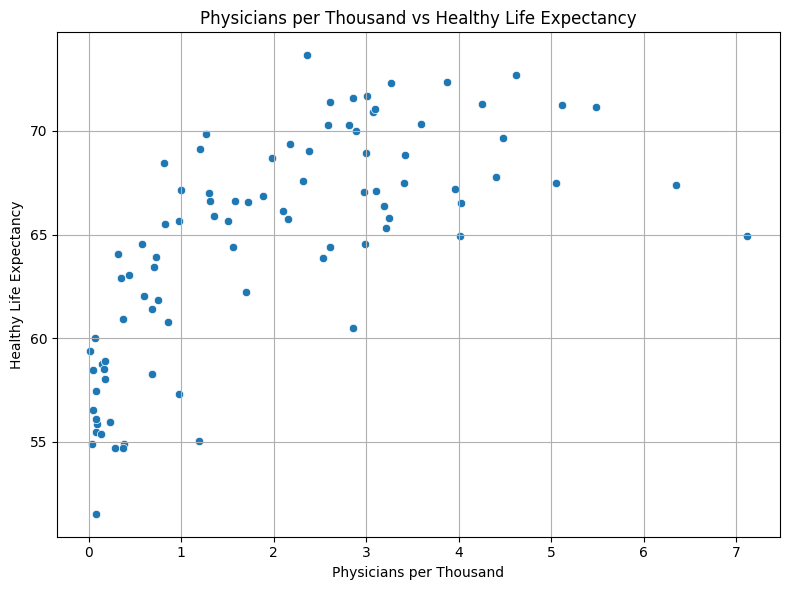

In [ ]:
# Creating scatter plot of 'Physicians per Thousand' vs 'Healthy Life Expectancy'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physicians per thousand', y='Healthy life expectancy', data=merged_df)

# Adding labels and title
plt.xlabel('Physicians per Thousand')
plt.ylabel('Healthy Life Expectancy')
plt.title('Physicians per Thousand vs Healthy Life Expectancy')
plt.grid(True)

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
display(world_prosp_df.head())
display(world_prosp_df.tail())

,Country,Average Score,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


,Country,Average Score,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
166,South Sudan,30.40,16.54,26.98,22.16,36.10,33.34,37.52,32.89,32.30,21.99,35.69,18.99,50.35


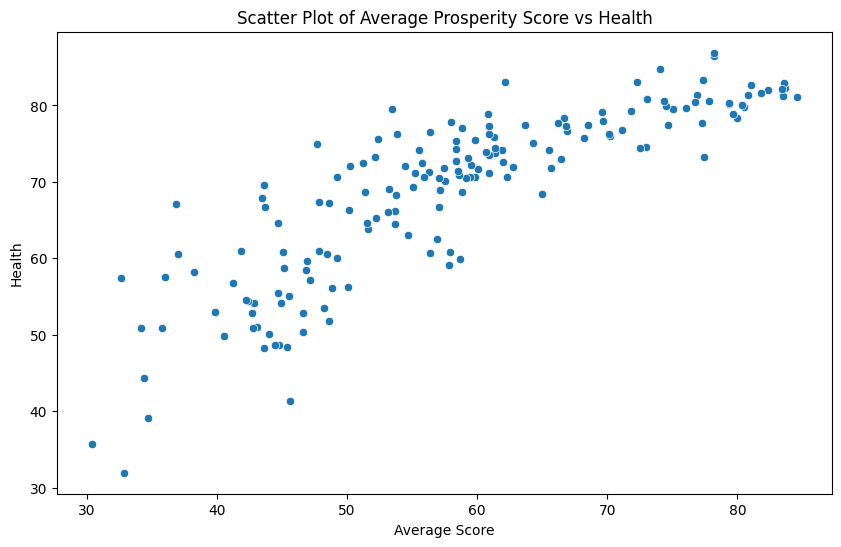

In [ ]:
# Create the scatter plot of Average Prosperity Score and Health
plt.figure(figsize=(10, 6))
sns.scatterplot(x=world_prosp_df['AveragScore'], y=world_prosp_df['Health'])

# Adding labels and title
plt.xlabel('Average Score')
plt.ylabel('Health')
plt.title('Scatter Plot of Average Prosperity Score vs Health')

# Show plot
plt.show()

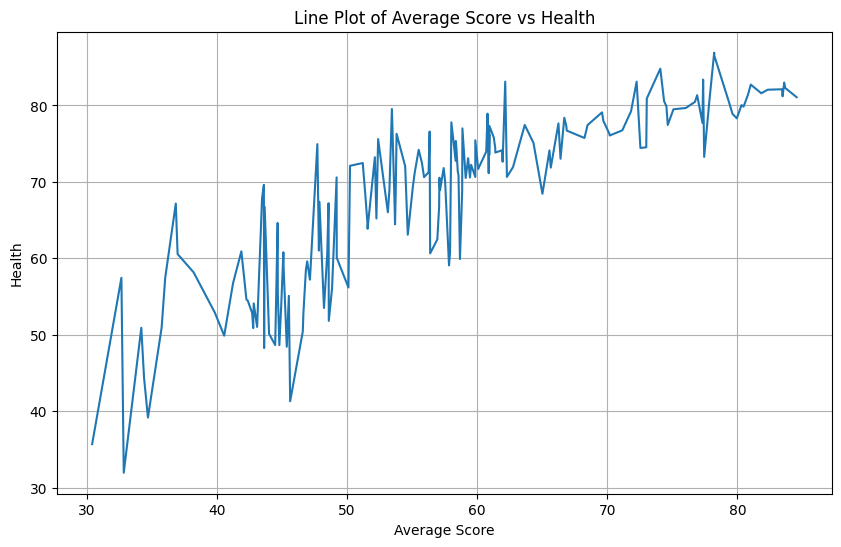

In [ ]:
# Creating a plot of average prosperity score vs health
plt.figure(figsize=(10, 6))
plt.plot(world_prosp_df['AveragScore'], world_prosp_df['Health'], linestyle='-')

# Adding labels and title
plt.xlabel('Average Score')
plt.ylabel('Health')
plt.title('Line Plot of Average Score vs Health')
plt.grid(True)

# Show plot
plt.show()

In [ ]:
display(happy_cleaned.head())

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


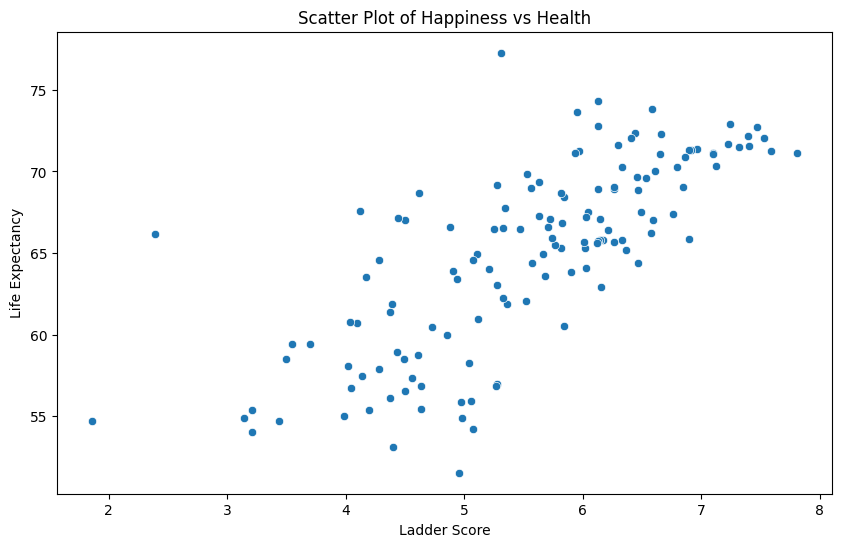

In [ ]:
# Ladder score and Healthy life expectancy scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=happy_cleaned['Ladder score'], y=happy_cleaned['Healthy life expectancy'])

# Adding labels and title
plt.xlabel('Ladder Score')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Happiness vs Health')

# Show plot
plt.show()

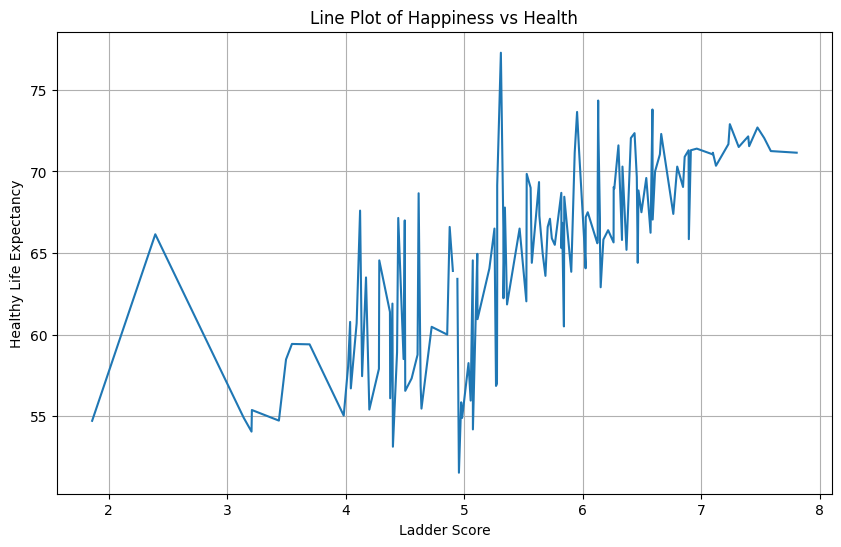

In [ ]:
# Happiness score vs health line plot
plt.figure(figsize=(10, 6))
plt.plot(happy_cleaned['Ladder score'], happy_cleaned['Healthy life expectancy'], linestyle='-')

# Adding labels and title
plt.xlabel('Ladder Score')
plt.ylabel('Healthy Life Expectancy')
plt.title('Line Plot of Happiness vs Health')

# Show plot
plt.grid(True)  # Add grid lines for better readability
plt.show()

                    Health  LivingConditions  Average Score
Health            1.000000          0.903219       0.845327
LivingConditions  0.903219          1.000000       0.894489
Average Score     0.845327          0.894489       1.000000


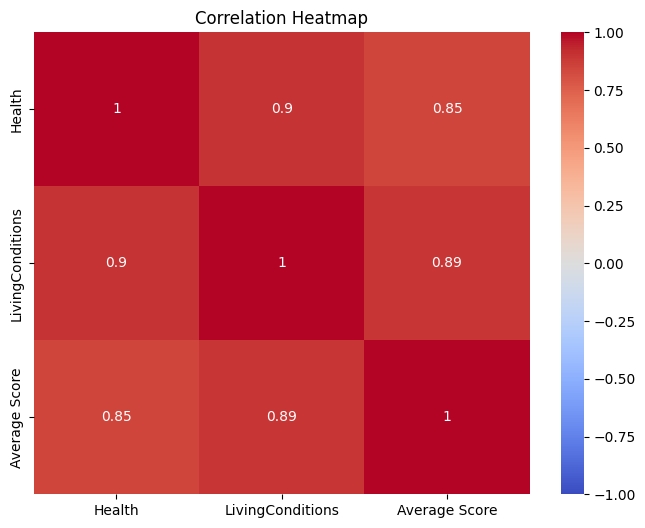

In [ ]:
# Creating a heatmap of Health and how it correlates with Living Conditions and prosperity score
columns_of_interest = ['Health', 'LivingConditions', 'Average Score']

# Calculate correlation matrix
correlation_table = world_prosp_df[columns_of_interest].corr()

# Print or display the correlation table
print(correlation_table)

# Visualizing correlation table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

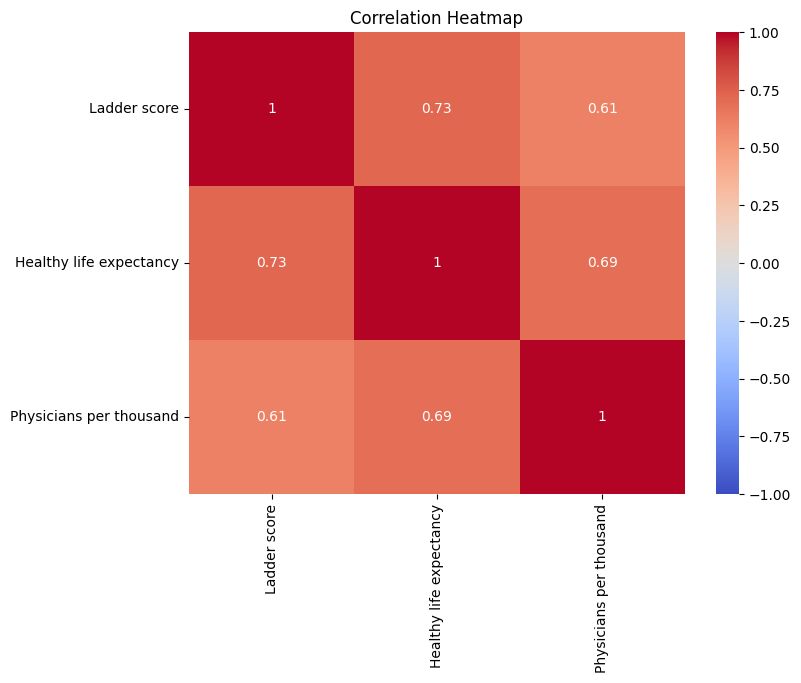

In [ ]:
# Heatmap happiness
correlation_table = merged_df[['Ladder score', 'Healthy life expectancy', 'Physicians per thousand']].corr()

# Visualizing correlation table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Strip whitespace from each column in merged_df_clean
merged_df_clean = merged_df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Strip whitespace from each column in world_prosp_df
world_prosp_df = world_prosp_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
merged_df_clean = merged_df_clean.rename(columns={'Country name_1': 'Country_name_cleaned'})
display(merged_df_clean.head())

,Country_name_cleaned,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,...,24.40%,4.62,"9,053,300",64.00%,23.10%,25.30%,3.86%,"8,374,393",31.046051,34.851612
1,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,...,10.60%,3.01,"645,397",59.30%,26.50%,20.40%,5.36%,"565,488",49.815273,6.129583
2,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,...,12.60%,3.59,"4,841,000",69.90%,29.00%,34.60%,4.07%,"4,258,860",-40.900557,174.885971
3,Canada,6.961,10.773,0.929,71.400,0.874,0.153,0.420,1.778,1.881,...,14.60%,2.61,"36,991,981",65.10%,12.80%,24.50%,5.56%,"30,628,482",56.130366,-106.346771
4,Germany,6.892,10.879,0.896,71.300,0.846,0.030,0.420,1.778,1.919,...,12.50%,4.25,"83,132,799",60.80%,11.50%,48.80%,3.04%,"64,324,835",51.165691,10.451526


In [ ]:
print("Columns in merged_df_clean before renaming:", merged_df_clean.columns)
print("Duplicates in merged_df_clean:", merged_df_clean.columns[merged_df_clean.columns.duplicated()].tolist())

Columns in merged_df_clean before renaming: Index(['Country_name_cleaned', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Country_name_cleaned', 'Density\n(P/Km2)',
       'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City',
       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code',
       'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infa

In [ ]:
# Drop duplicate columns
merged_df_clean = merged_df_clean.loc[:, ~merged_df_clean.columns.duplicated()]

# Verify columns are now unique
print("Columns in merged_df_clean after removing duplicates:", merged_df_clean.columns)

Columns in merged_df_clean after removing duplicates: Index(['Country_name_cleaned', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Density\n(P/Km2)', 'Abbreviation',
       'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate',
       'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',

In [ ]:
# Rename columns
world_prosp_df = world_prosp_df.rename(columns={'Country name': 'Country'})

# Ensure merged_df_clean has a unique column label for merging
merged_df_clean = merged_df_clean.rename(columns={'Country name': 'Country_name_cleaned'})

# Perform the merge
merged_df_final = pd.merge(merged_df_clean, world_prosp_df, left_on='Country_name_cleaned', right_on='Country')

# Display the first few rows of the merged DataFrame to verify
display(merged_df_final.head())


,Country_name_cleaned,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,...,75.40,54.44,80.18,74.02,71.54,70.96,93.50,83.10,81.63,54.09
1,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,...,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
2,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,...,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71
3,Canada,6.961,10.773,0.929,71.400,0.874,0.153,0.420,1.778,1.881,...,82.34,73.60,80.68,76.22,77.14,65.34,93.49,78.88,84.19,69.09
4,Germany,6.892,10.879,0.896,71.300,0.846,0.030,0.420,1.778,1.919,...,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69


                    Health  LivingConditions  Average Score  Ladder score
Health            1.000000          0.902126       0.844302      0.760731
LivingConditions  0.902126          1.000000       0.887267      0.775386
Average Score     0.844302          0.887267       1.000000      0.806754
Ladder score      0.760731          0.775386       0.806754      1.000000


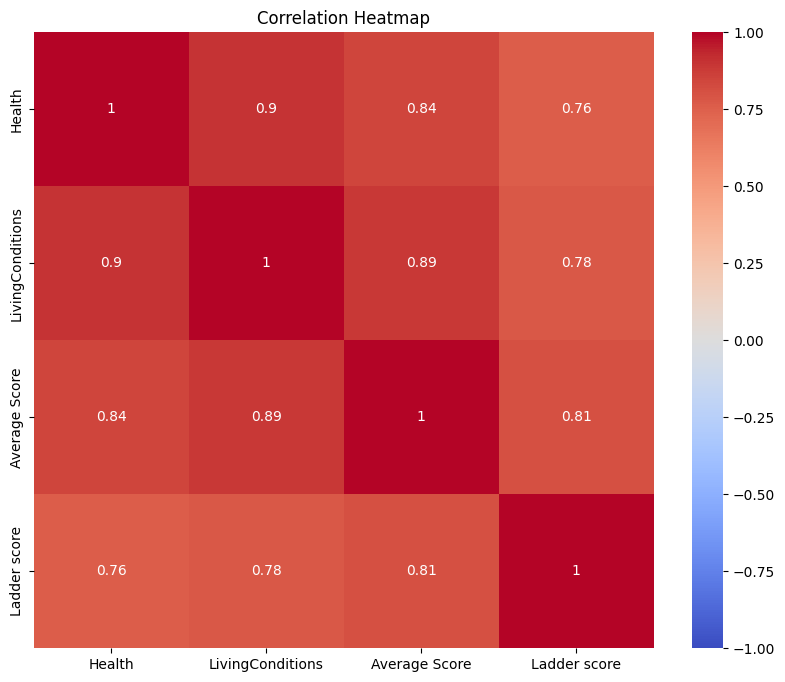

In [ ]:
# Updated list of columns to include 'Ladder score'
columns_of_interest = ['Health', 'LivingConditions', 'Average Score', 'Ladder score']

# Calculate correlation matrix
correlation_table = merged_df_final[columns_of_interest].corr()

# Print or display the correlation table
print(correlation_table)

# Visualizing correlation table as a heatmap
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-57-129684a363a0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder score', y='Country', data=top_10_ladder, palette='Blues_d')
<ipython-input-57-129684a363a0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Score', y='Country', data=top_10_avg_score, palette='Oranges_d')


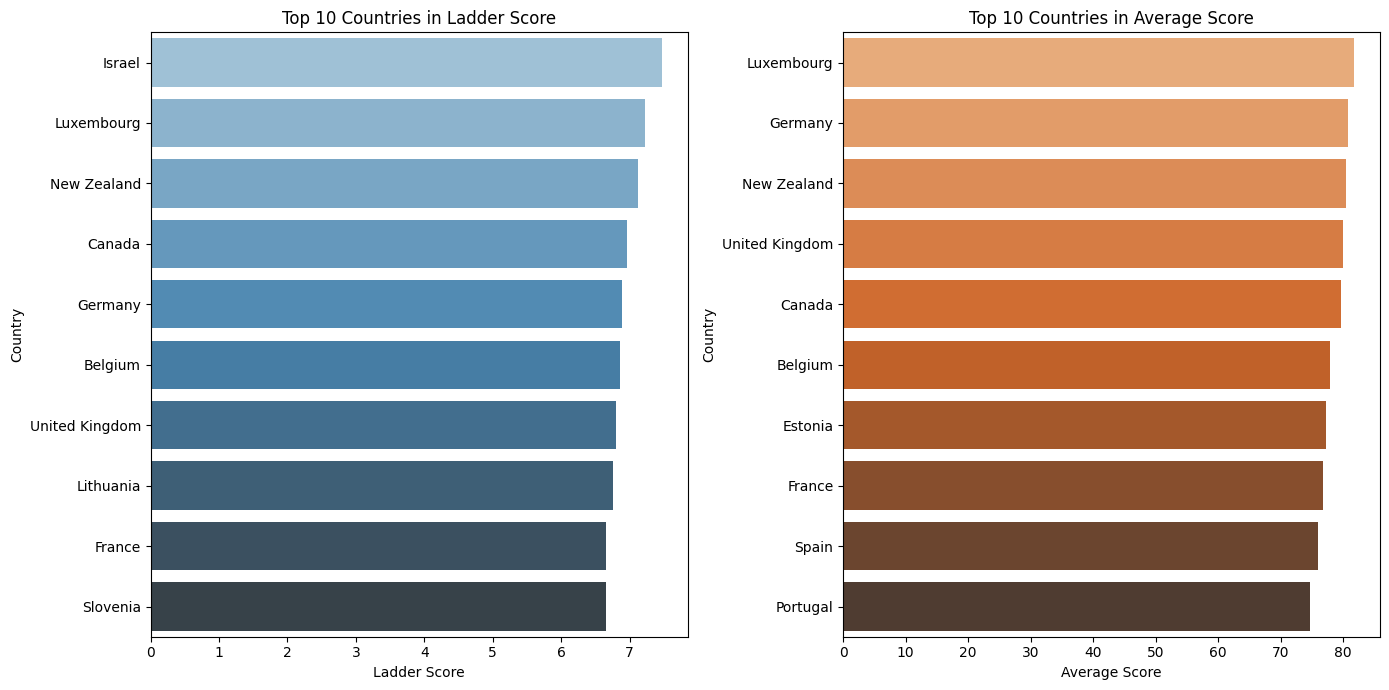

In [ ]:
# Get the top 10 countries in Ladder Score
top_10_ladder = merged_df_final.nlargest(10, 'Ladder score')

# Get the top 10 countries in Average Score
top_10_avg_score = merged_df_final.nlargest(10, 'Average Score')

# Create a figure with two subplots
plt.figure(figsize=(14, 7))

# Plot for Ladder Score
plt.subplot(1, 2, 1)
sns.barplot(x='Ladder score', y='Country', data=top_10_ladder, palette='Blues_d')
plt.xlabel('Ladder Score')
plt.ylabel('Country')
plt.title('Top 10 Countries in Ladder Score')

# Plot for Average Score
plt.subplot(1, 2, 2)
sns.barplot(x='Average Score', y='Country', data=top_10_avg_score, palette='Oranges_d')
plt.xlabel('Average Score')
plt.ylabel('Country')
plt.title('Top 10 Countries in Average Score')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

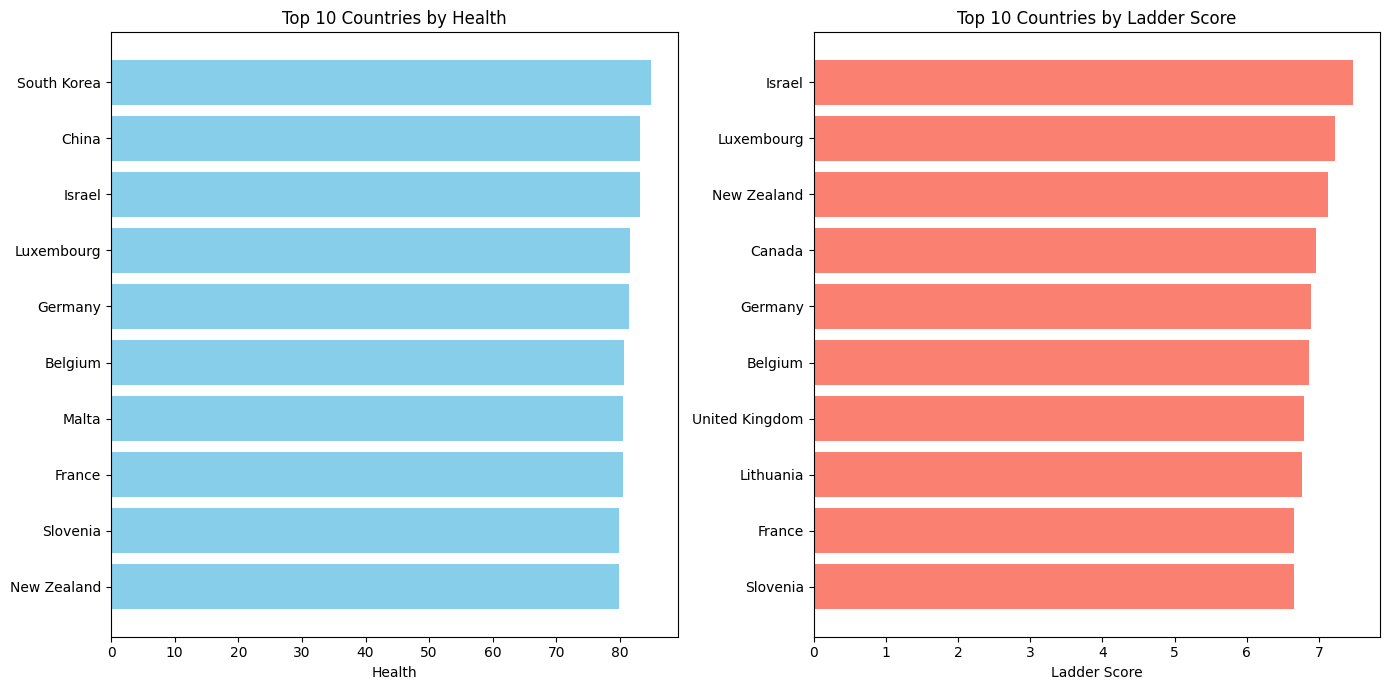

In [ ]:
# Extract the top 10 countries for each metric
top_10_health = merged_df_final.nlargest(10, 'Health')
top_10_ladder_score = merged_df_final.nlargest(10, 'Ladder score')

# Create a figure with two subplots
plt.figure(figsize=(14, 7))

# Plot for Health
plt.subplot(1, 2, 1)
plt.barh(top_10_health['Country'], top_10_health['Health'], color='skyblue')
plt.xlabel('Health')
plt.title('Top 10 Countries by Health')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Plot for Ladder Score
plt.subplot(1, 2, 2)
plt.barh(top_10_ladder_score['Country'], top_10_ladder_score['Ladder score'], color='salmon')
plt.xlabel('Ladder Score')
plt.title('Top 10 Countries by Ladder Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

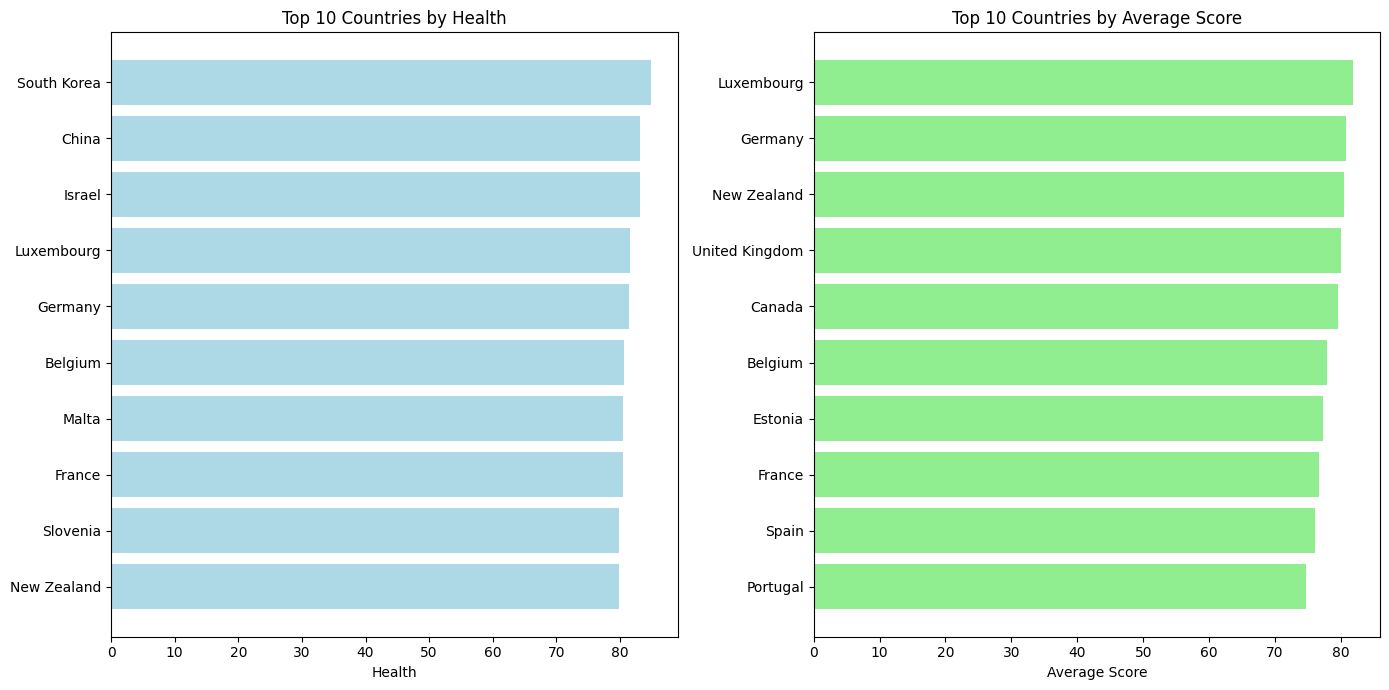

In [ ]:
# Extract the top 10 countries for each metric
top_10_health = merged_df_final.nlargest(10, 'Health')
top_10_average_score = merged_df_final.nlargest(10, 'Average Score')

# Create a figure with two subplots
plt.figure(figsize=(14, 7))

# Plot for Health
plt.subplot(1, 2, 1)
plt.barh(top_10_health['Country'], top_10_health['Health'], color='lightblue')
plt.xlabel('Health')
plt.title('Top 10 Countries by Health')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Plot for Average Score
plt.subplot(1, 2, 2)
plt.barh(top_10_average_score['Country'], top_10_average_score['Average Score'], color='lightgreen')
plt.xlabel('Average Score')
plt.title('Top 10 Countries by Average Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()